# **6.01 CNNを使って犬と猫の学習**

# 【データの準備と確認】

リスト6-1：（リストA）

In [1]:
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 56.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=aee127b5f532a9b1f35644656ac3684cfcc994c253fb9f8bddc5352078eb3db5
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


リスト6-2

In [2]:
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"学習データ（問題画像）　：{x_train.shape}")
print(f"テストデータ（問題画像）：{x_test.shape}")

170498071/170498071 [==============================] - 13s 0us/step
学習データ（問題画像）　：(50000, 32, 32, 3)
テストデータ（問題画像）：(10000, 32, 32, 3)


リスト6-3

In [3]:
y_train, y_test = y_train.flatten(), y_test.flatten()

cat_train = x_train[np.where(y_train==3)]
dog_train = x_train[np.where(y_train==5)]
cat_test = x_test[np.where(y_test==3)]
dog_test = x_test[np.where(y_test==5)]

print("ネコ学習データ　：", len(cat_train))
print("イヌ学習データ　：", len(dog_train))
print("ネコテストデータ：", len(cat_test))
print("イヌテストデータ：", len(dog_test))

ネコ学習データ　： 5000
イヌ学習データ　： 5000
ネコテストデータ： 1000
イヌテストデータ： 1000


リスト6-4

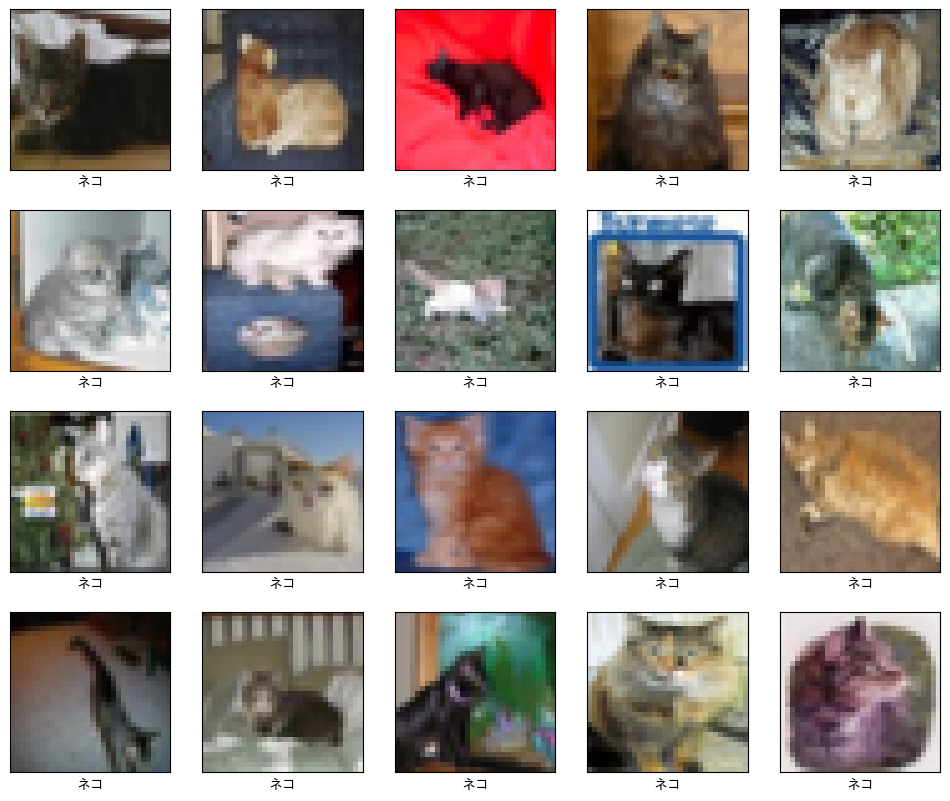

In [4]:
def disp_testdata(xdata, namedata):
    plt.figure(figsize=(12,10))
    for i in range(20):
        plt.subplot(4,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(xdata[i])
        plt.xlabel(namedata)
    plt.show()

disp_testdata(cat_train, "ネコ")

リスト6-5

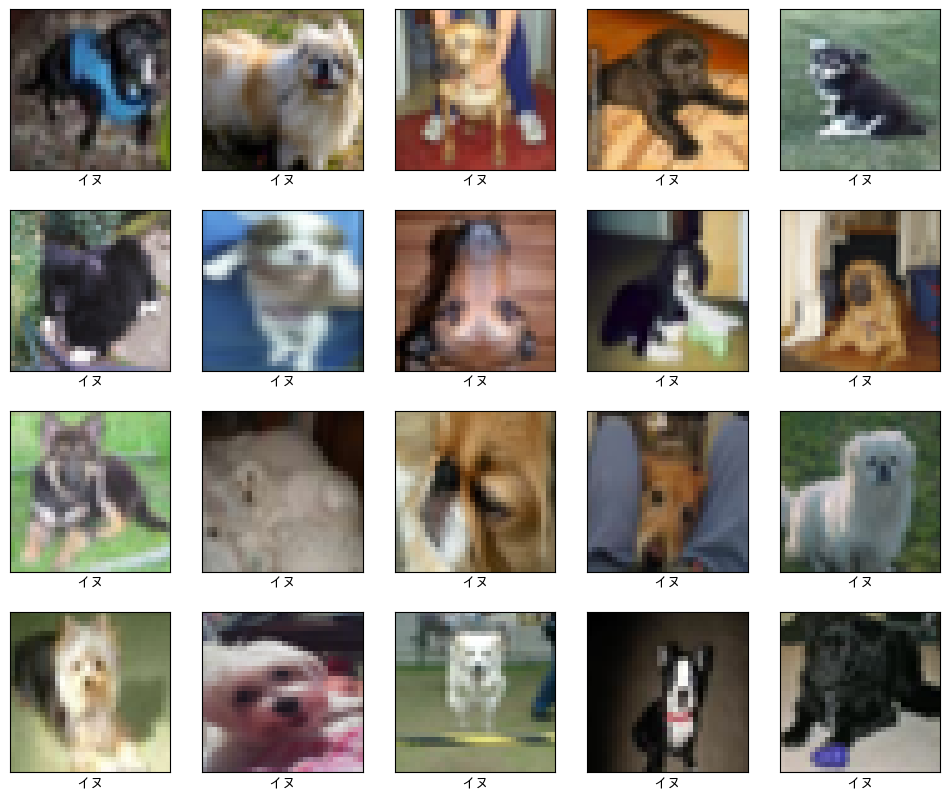

In [5]:
disp_testdata(dog_train, "イヌ")

2つのデータを混ぜ合わせて、学習用とテスト用のデータを作る

リスト6-6

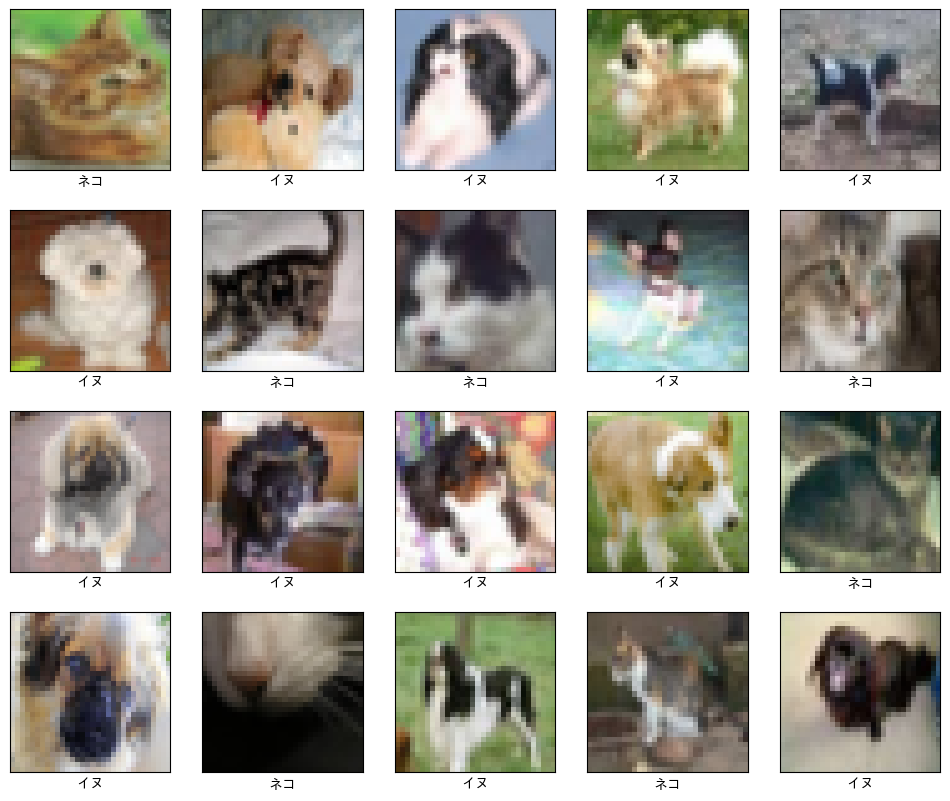

In [6]:
class_names = ["ネコ", "イヌ"]

x_train = np.concatenate((cat_train, dog_train))
x_test = np.concatenate((cat_test, dog_test))

y_train = np.concatenate((np.full(5000, 0), np.full(5000, 1)))
y_test = np.concatenate((np.full(1000, 0), np.full(1000, 1)))

np.random.seed(1)
np.random.shuffle(x_test)
np.random.seed(1)
np.random.shuffle(y_test)

plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])
    plt.xlabel(class_names[y_test[i]])
plt.show()

# 【モデルを作って学習】

リスト6-7

In [7]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(2, activation="softmax")) #2
model.summary(line_length=120)

Model: "sequential"
________________________________________________________________________________________________________________________
 Layer (type)                                         Output Shape                                    Param #           
 conv2d (Conv2D)                                      (None, 28, 28, 32)                              2432              
                                                                                                                        
 max_pooling2d (MaxPooling2D)                         (None, 14, 14, 32)                              0                 
                                                                                                                        
 dropout (Dropout)                                    (None, 14, 14, 32)                              0                 
                                                                                                                        
 conv2d_1 (C

リスト6-8（リストB’）

In [8]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=30, #30
                    validation_data=(x_test, y_test))
test_loss, test_acc =model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc:.2%}です。")

Epoch 1/30
313/313 [==============================] - 15s 6ms/step - loss: 0.6685 - accuracy: 0.5816 - val_loss: 0.6392 - val_accuracy: 0.6250
Epoch 2/30
313/313 [==============================] - 2s 6ms/step - loss: 0.6227 - accuracy: 0.6554 - val_loss: 0.6289 - val_accuracy: 0.6425
Epoch 3/30
313/313 [==============================] - 2s 6ms/step - loss: 0.5921 - accuracy: 0.6801 - val_loss: 0.5729 - val_accuracy: 0.6935
Epoch 4/30
313/313 [==============================] - 2s 5ms/step - loss: 0.5674 - accuracy: 0.7052 - val_loss: 0.5735 - val_accuracy: 0.7150
Epoch 5/30
313/313 [==============================] - 2s 5ms/step - loss: 0.5464 - accuracy: 0.7185 - val_loss: 0.5385 - val_accuracy: 0.7280
Epoch 6/30
313/313 [==============================] - 2s 5ms/step - loss: 0.5253 - accuracy: 0.7299 - val_loss: 0.5131 - val_accuracy: 0.7410
Epoch 7/30
313/313 [==============================] - 2s 5ms/step - loss: 0.5033 - accuracy: 0.7508 - val_loss: 0.5186 - val_accuracy: 0.7455
Epoch

リスト6-9：（リストC）

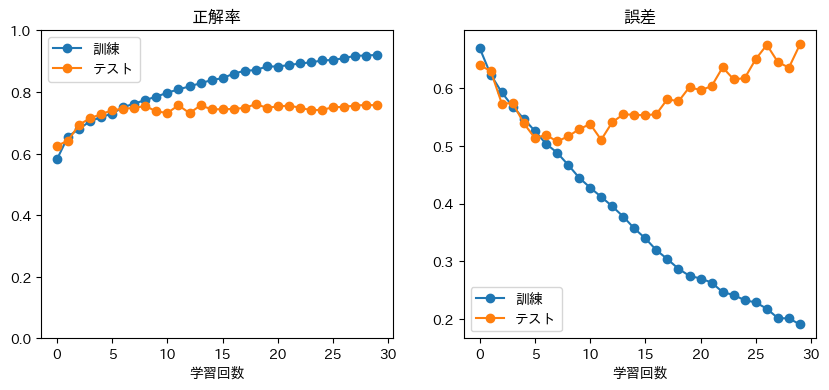

In [9]:
param = [["正解率", "accuracy", "val_accuracy"],
          ["誤差", "loss", "val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]], "o-")
    plt.plot(history.history[param[i][2]], "o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"], loc="best")
    if i==0:
        plt.ylim([0,1])
plt.show()

# 【学習データを水増し】

リスト6-10

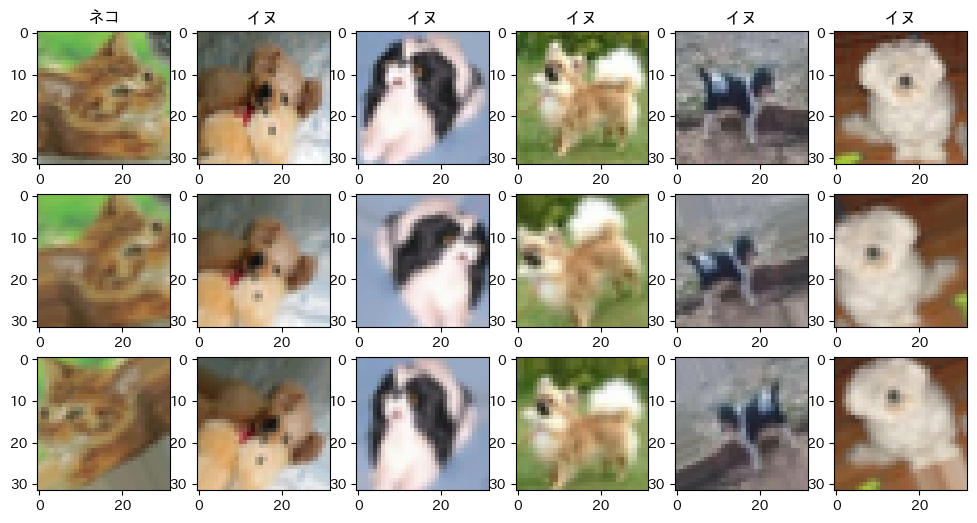

In [10]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 30,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip=True,
)
g = datagen.flow(x_test, y_test,  shuffle=False)
g_imgs1 = []
x_g, y_g = g.next()
g_imgs1.extend(x_g)

g = datagen.flow(x_test, y_test,  shuffle=False)
g_imgs2 = []
x_g, y_g = g.next()
g_imgs2.extend(x_g)

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(3, 6, i+1)
    plt.imshow(x_test[i], cmap="Greys")
    plt.title(class_names[y_g[i]])

for i in range(6):
    plt.subplot(3, 6, i+7)
    plt.imshow(g_imgs1[i])

for i in range(6):
    plt.subplot(3, 6, i+13)
    plt.imshow(g_imgs2[i])
plt.show()

学習の追加

リスト6-11

In [11]:
history = model.fit(datagen.flow(x_train, y_train), epochs=30,
                    validation_data=(x_test, y_test))
test_loss, test_acc =model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc:.2%}です。")

Epoch 1/30
313/313 [==============================] - 7s 22ms/step - loss: 0.6024 - accuracy: 0.6921 - val_loss: 0.5074 - val_accuracy: 0.7580
Epoch 2/30
313/313 [==============================] - 7s 21ms/step - loss: 0.5557 - accuracy: 0.7149 - val_loss: 0.4802 - val_accuracy: 0.7680
Epoch 3/30
313/313 [==============================] - 7s 24ms/step - loss: 0.5400 - accuracy: 0.7288 - val_loss: 0.4671 - val_accuracy: 0.7715
Epoch 4/30
313/313 [==============================] - 6s 21ms/step - loss: 0.5448 - accuracy: 0.7208 - val_loss: 0.4705 - val_accuracy: 0.7870
Epoch 5/30
313/313 [==============================] - 7s 21ms/step - loss: 0.5361 - accuracy: 0.7277 - val_loss: 0.4705 - val_accuracy: 0.7775
Epoch 6/30
313/313 [==============================] - 7s 23ms/step - loss: 0.5257 - accuracy: 0.7382 - val_loss: 0.4682 - val_accuracy: 0.7835
Epoch 7/30
313/313 [==============================] - 7s 24ms/step - loss: 0.5261 - accuracy: 0.7426 - val_loss: 0.4725 - val_accuracy: 0.7760

リスト6-12：（リストC）

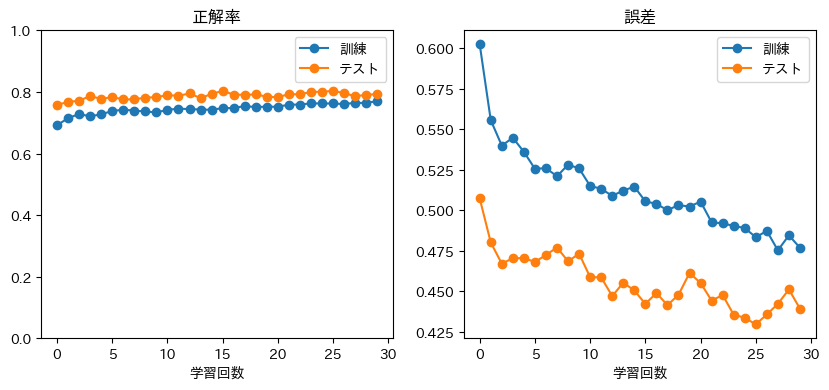

In [12]:
param = [["正解率", "accuracy", "val_accuracy"],
          ["誤差", "loss", "val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]], "o-")
    plt.plot(history.history[param[i][2]], "o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"], loc="best")
    if i==0:
        plt.ylim([0,1])
plt.show()

# 【データを渡して予測】

リスト6-13

63/63 [==============================] - 0s 2ms/step


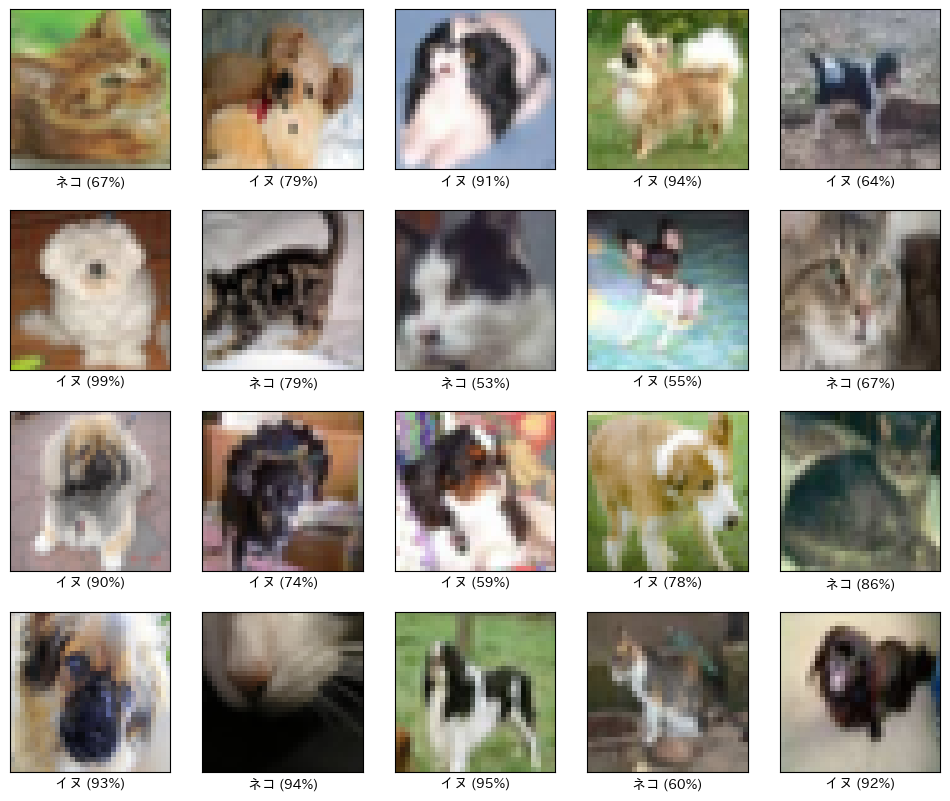

In [13]:
pre = model.predict(x_test)

plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])

    index = np.argmax(pre[i])
    pct = pre[i][index]
    ans = ""
    if index != y_test[i]:
        ans = "x--o["+class_names[y_test[i]]+"]"
    lbl = f"{class_names[index]} ({pct:.0%}){ans}"
    plt.xlabel(lbl)
plt.show()